In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd '/content/drive/My Drive/open_iit_data/'

/content/drive/My Drive/open_iit_data


In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM, Dropout
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from keras.layers import LeakyReLU
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
# np.random.seed(0)

In [4]:
dataset = pd.read_csv('Final_whole_data.csv')
df= dataset.drop(columns= ['helper'])

In [5]:
df.drop(columns = [ 'venkateswara swamy' , 'ttd' ] , inplace = True)

In [6]:
df.head(10)

,Date,tirupati rooms,tirupati temple history,venkateswara yt,tirupati darshan timings,tirumala,train to tirupati,tirupati,tirupati train,kanipakam,tirupati distance,kalahasti,Pilgrims
0,20-10-2013,21,22,59,32,49,72,42,51,35,36,60,367700.0
1,27-10-2013,16,30,58,24,50,81,42,53,40,34,46,363223.0
2,03-11-2013,9,0,49,34,63,89,45,61,38,42,53,425182.0
3,10-11-2013,19,0,31,0,60,72,45,55,32,36,72,406690.0
4,17-11-2013,24,0,41,24,58,81,45,53,31,53,74,378546.0
5,24-11-2013,36,33,66,69,57,75,47,53,42,50,70,378180.0
6,01-12-2013,25,0,53,66,55,83,50,55,41,53,60,397085.0
7,08-12-2013,21,0,69,36,51,74,41,55,32,39,46,410901.0
8,15-12-2013,27,37,66,16,48,62,41,50,36,33,48,390455.0
9,22-12-2013,18,0,58,36,48,64,43,47,37,45,69,442936.0


In [7]:
df.drop(columns = [ 'Date' ] , inplace = True)

In [8]:
target = df["Pilgrims"]
val = 12
features = df.iloc[:,:]

In [9]:
k = 50
train_features = np.array(features.iloc[0:520-k,:])
train_target = np.array(target.iloc[0:520-k])
test_features = np.array(features.iloc[520-k:520,:])
test_target = np.array(target.iloc[520-k:520])

In [10]:
print(train_target.shape)
print(test_features.shape)

(470,)
(50, 12)


In [11]:
scaler = MinMaxScaler(feature_range=(0, 1))
train_features = scaler.fit_transform(train_features)
test_features = scaler.transform(test_features)
train_target = scaler.fit_transform(train_target.reshape(-1, 1))
test_target = scaler.transform(test_target.reshape(-1, 1))

sequence_length = 1
X_train, Y_train = list(), list()
for i in range(train_features.shape[0] - sequence_length):
    X_train.append(train_features[i:i + sequence_length, :])
    Y_train.append(train_target[i + sequence_length])
X_train, Y_train = np.asarray(X_train), np.asarray(Y_train)

X_test, Y_test = list(), list()
for i in range(test_features.shape[0] - sequence_length):
    X_test.append(test_features[i:i + sequence_length, :])
    Y_test.append(test_target[i + sequence_length])

X_test, Y_test = np.asarray(X_test), np.asarray(Y_test)

print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)
print(X_train[0])
print(Y_train[0])

(469, 1, 12) (49, 1, 12)
(469, 1) (49, 1)
[[0.21       0.22       0.5        0.32       0.232      0.71717172
  0.26582278 0.48958333 0.30851064 0.31182796 0.56989247 0.54519877]]
[0.53798032]


In [12]:
X_train[0]

array([[0.21      , 0.22      , 0.5       , 0.32      , 0.232     ,
        0.71717172, 0.26582278, 0.48958333, 0.30851064, 0.31182796,
        0.56989247, 0.54519877]])

In [13]:
model = Sequential([
        LSTM(sequence_length, input_shape = (sequence_length,val)),
        LeakyReLU(),
        Dense(units = 32),
        LeakyReLU(),
        Dense(units = 16),
        LeakyReLU(),
        Dense(units = 1),
        LeakyReLU(),
    ])

model.compile(loss = 'mean_squared_error', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1)                 56        
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 1)                 0         
                                                                 
 dense (Dense)               (None, 32)                64        
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 1

In [14]:
history = model.fit(X_train, Y_train,validation_data=(X_test,Y_test), epochs= 40, batch_size = 2)
loss_history = history.history['loss']

Epoch 1/40
235/235 [==============================] - 5s 5ms/step - loss: 0.1006 - val_loss: 0.0164
Epoch 2/40
235/235 [==============================] - 1s 3ms/step - loss: 0.0299 - val_loss: 0.0067
Epoch 3/40
235/235 [==============================] - 1s 3ms/step - loss: 0.0117 - val_loss: 0.0039
Epoch 4/40
235/235 [==============================] - 1s 3ms/step - loss: 0.0081 - val_loss: 0.0031
Epoch 5/40
235/235 [==============================] - 1s 3ms/step - loss: 0.0069 - val_loss: 0.0041
Epoch 6/40
235/235 [==============================] - 1s 3ms/step - loss: 0.0066 - val_loss: 0.0036
Epoch 7/40
235/235 [==============================] - 1s 3ms/step - loss: 0.0062 - val_loss: 0.0032
Epoch 8/40
235/235 [==============================] - 1s 3ms/step - loss: 0.0060 - val_loss: 0.0035
Epoch 9/40
235/235 [==============================] - 1s 3ms/step - loss: 0.0053 - val_loss: 0.0028
Epoch 10/40
235/235 [==============================] - 1s 3ms/step - loss: 0.0054 - val_loss: 0.0032

In [15]:
# Access the loss history from the 'history' object
loss_history = history.history['loss']
val_loss_history = history.history['val_loss']

In [16]:
loss_history_ = pd.DataFrame(loss_history)
loss_history_.to_csv('loss_history_.csv')

In [17]:
val_loss_history_ = pd.DataFrame(val_loss_history)
val_loss_history_.to_csv('val_loss_history_.csv')

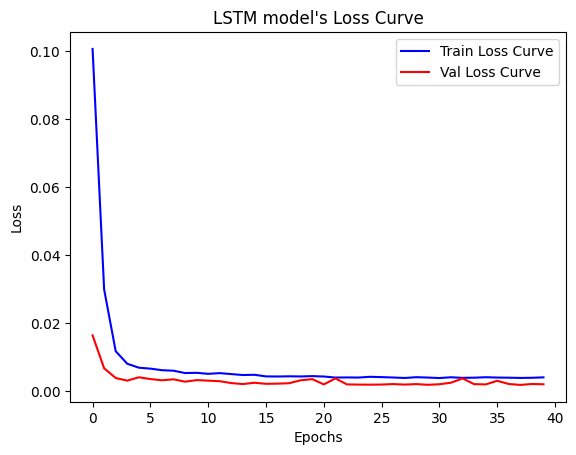

In [18]:
plt.plot(loss_history, color = 'blue', label = 'Train Loss Curve')
plt.plot(val_loss_history , color = 'red' , label = 'Val Loss Curve')
plt.title('LSTM model\'s Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [19]:
train_predict = model.predict(X_train)

15/15 [==============================] - 0s 2ms/step


In [20]:
train_predict.shape

(469, 1)

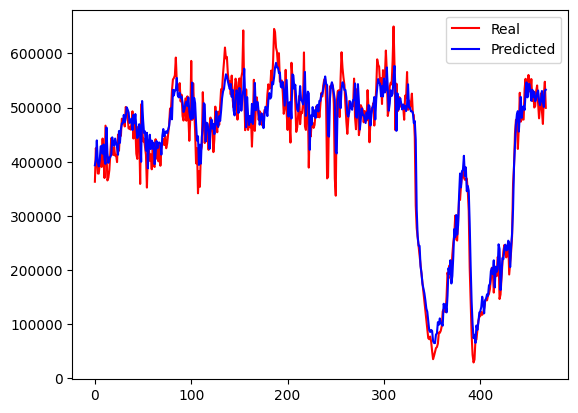

In [21]:
orgpredict_train = scaler.inverse_transform(train_predict)
y_train_org =scaler.inverse_transform(Y_train.reshape(-1, 1))
plt.plot(y_train_org, color='red',label='Real')
plt.plot(orgpredict_train, color='blue',label='Predicted')
plt.legend()
plt.show()

In [22]:
y_train_org.shape

(469, 1)

In [23]:
X_test.shape

(49, 1, 12)

2/2 [==============================] - 0s 6ms/step


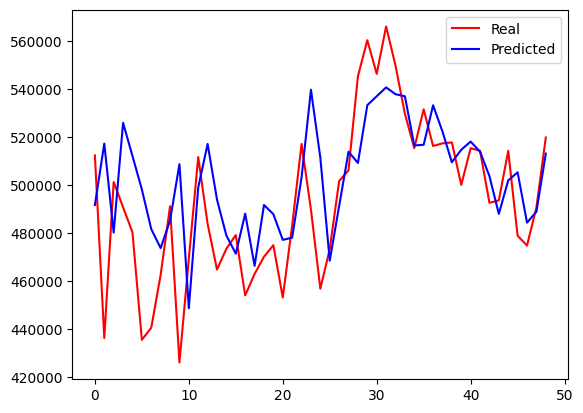

In [24]:
test_predict = model.predict(X_test)
orgpredict = scaler.inverse_transform(test_predict)
y_test_org =scaler.inverse_transform(Y_test.reshape(-1, 1))
plt.plot(y_test_org, color='red',label='Real')
plt.plot(orgpredict, color='blue',label='Predicted')
plt.legend()
plt.show()

In [25]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(orgpredict_train, y_train_org) * 100

7.547369742989245

In [26]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(orgpredict, y_test_org) * 100

4.035123159119147

In [27]:
val = 12
target = df["Pilgrims"]
features = df.iloc[:,:]
features = np.array(features.iloc[0:520,:])
target = np.array(target.iloc[0:520])

In [28]:
features = scaler.fit_transform(features)
target = scaler.fit_transform(target.reshape(-1, 1))

X, Y = list(), list()
for i in range(features.shape[0] - sequence_length):
    X.append(features[i:i + sequence_length, :])
    Y.append(target[i + sequence_length])
X, Y = np.asarray(X), np.asarray(Y)

print(target.size)
print(Y.size)

520
519


17/17 [==============================] - 0s 2ms/step


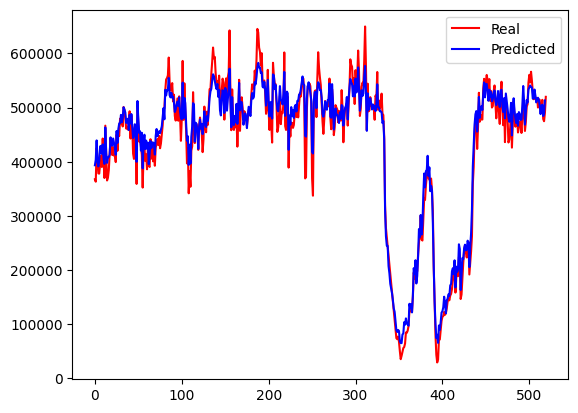

In [29]:
predict = model.predict(X)
predict = scaler.inverse_transform(predict)
target = scaler.inverse_transform(target.reshape(-1, 1))
plt.plot(target, color='red',label='Real')
plt.plot(predict, color='blue',label='Predicted')
plt.legend()
plt.show()

In [30]:
df = pd.DataFrame(data = predict)
df.to_csv("LSTMPREDICT.csv")

In [31]:
model.save('LSTM_MODEL.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
new_model = tf.keras.models.load_model('LSTM_MODEL.h5')

In [ ]:
features = scaler.fit_transform(features)
target = scaler.fit_transform(target.reshape(-1, 1))

X, Y = list(), list()
for i in range(features.shape[0] - sequence_length):
    X.append(features[i:i + sequence_length, :])
    Y.append(target[i + sequence_length])
X, Y = np.asarray(X), np.asarray(Y)

print(target.size)
print(Y.size)

520
519


17/17 [==============================] - 0s 3ms/step


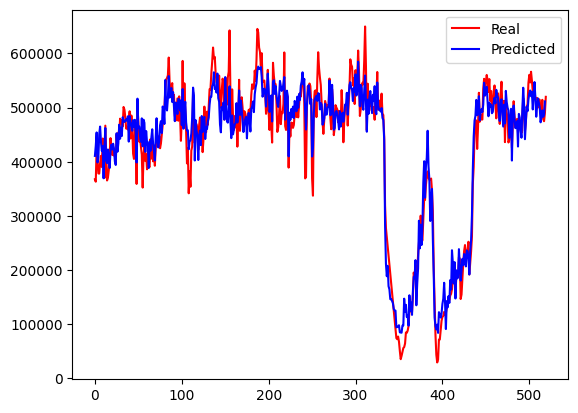

In [ ]:
predict = new_model.predict(X)
predict = scaler.inverse_transform(predict)
target = scaler.inverse_transform(target.reshape(-1, 1))
plt.plot(target, color='red',label='Real')
plt.plot(predict, color='blue',label='Predicted')
plt.legend()
plt.show()